In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'file:///Users/swarnkumar/Downloads/Suicides_in_India_2001_2012_from_GitHub.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

# Get general info on the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [5]:
# Check data types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in critical columns
df.dropna(subset=['Total'], inplace=True)

# Check if there are missing or non-numeric values in 'Total'
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Remove any rows with missing or non-numeric 'Total' values
df.dropna(subset=['Total'], inplace=True)


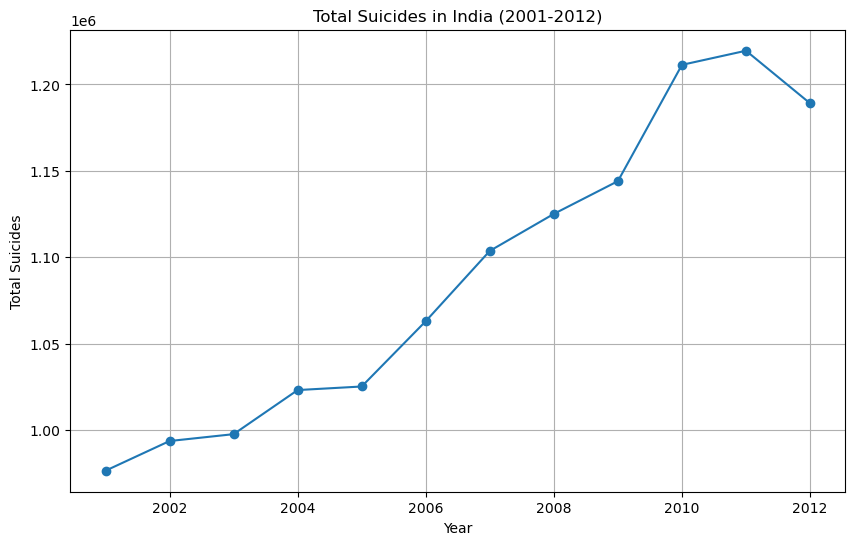

In [7]:
# Aggregate total suicides by year
suicides_by_year = df.groupby('Year')['Total'].sum()

# Plot total suicides by year
plt.figure(figsize=(10,6))
suicides_by_year.plot(kind='line', marker='o')
plt.title('Total Suicides in India (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()


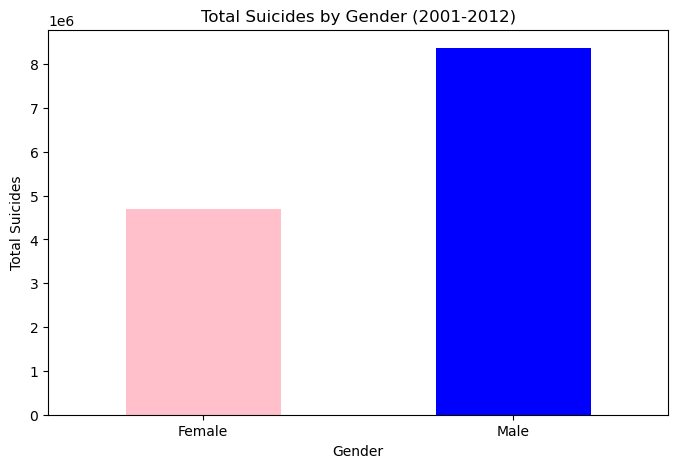

In [11]:
# Group by Gender
gender_suicides = df.groupby('Gender')['Total'].sum()

# Plot suicides by gender
plt.figure(figsize=(8,5))
gender_suicides.plot(kind='bar', color=['pink','blue'])
plt.title('Total Suicides by Gender (2001-2012)')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.xticks(rotation=0)
plt.show()


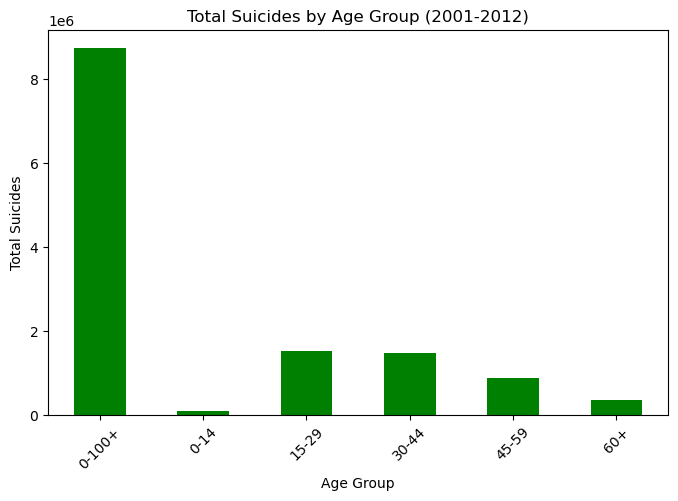

In [13]:
# Group by Age Group
age_group_suicides = df.groupby('Age_group')['Total'].sum()

# Plot suicides by age group
plt.figure(figsize=(8,5))
age_group_suicides.plot(kind='bar', color='green')
plt.title('Total Suicides by Age Group (2001-2012)')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.show()


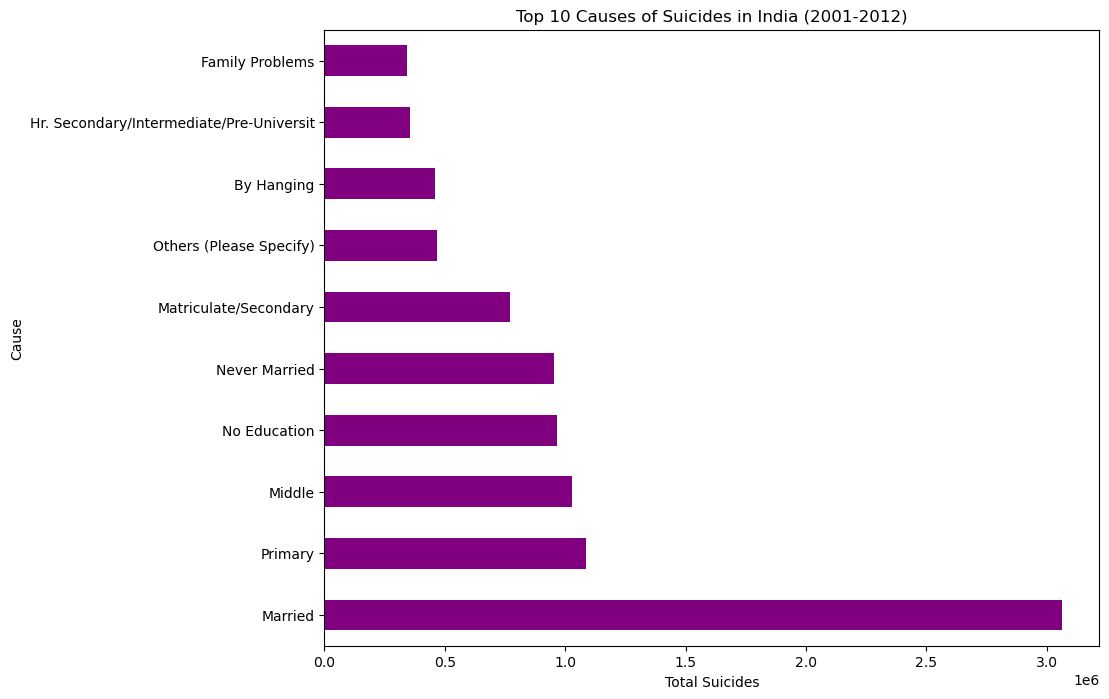

In [15]:
# Group by cause (Type) of suicides
suicide_causes = df.groupby('Type')['Total'].sum().sort_values(ascending=False)

# Plot top causes of suicides
plt.figure(figsize=(10,8))
suicide_causes.head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Causes of Suicides in India (2001-2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Cause')
plt.show()


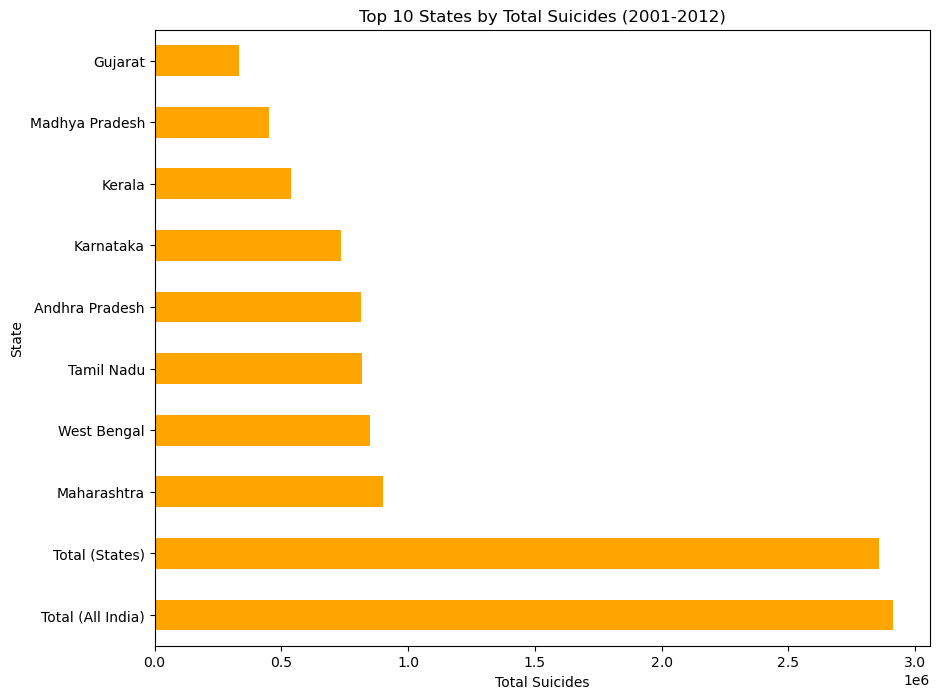

In [17]:
# Group by State and plot total suicides for top 10 states
state_suicides = df.groupby('State')['Total'].sum().sort_values(ascending=False)

# Plot total suicides by state (top 10)
plt.figure(figsize=(10,8))
state_suicides.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 States by Total Suicides (2001-2012)')
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()


<Figure size 1000x600 with 0 Axes>

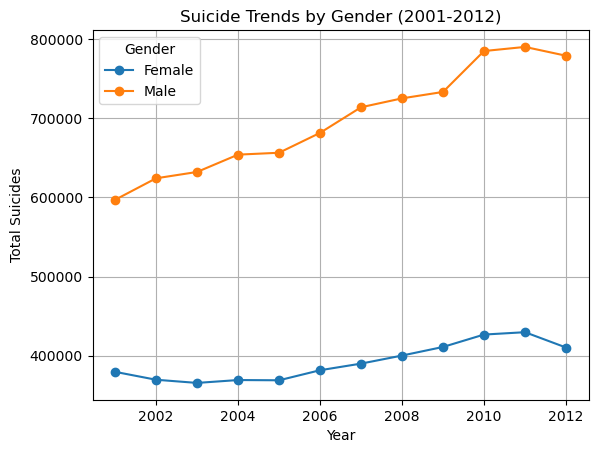

In [19]:
# Group by Year and Gender
gender_yearly_suicides = df.groupby(['Year', 'Gender'])['Total'].sum().unstack()

# Plot suicides over time by gender
plt.figure(figsize=(10,6))
gender_yearly_suicides.plot(kind='line', marker='o')
plt.title('Suicide Trends by Gender (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()


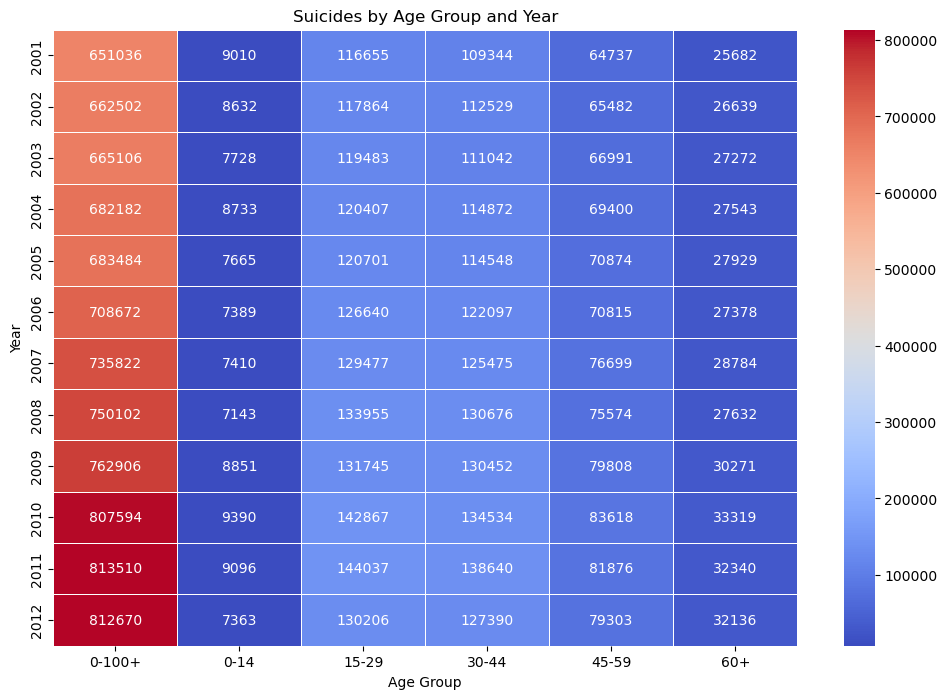

In [21]:
# Pivot the data to show suicides by age group and year
age_year_suicides = df.pivot_table('Total', index='Year', columns='Age_group', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(age_year_suicides, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Suicides by Age Group and Year')
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.show()


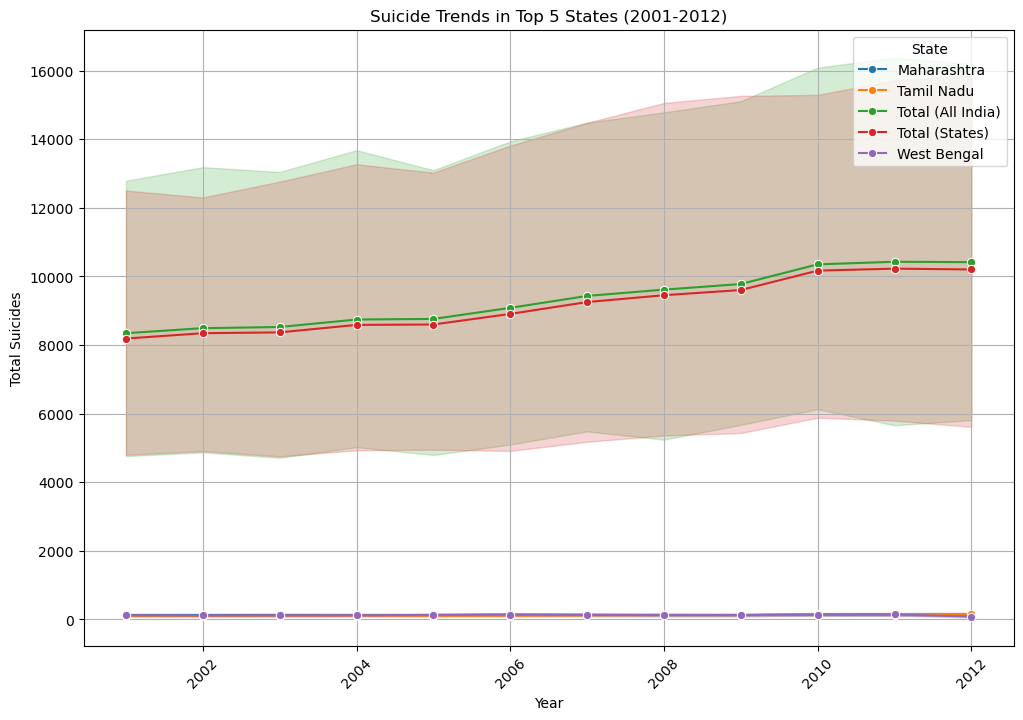

In [23]:
# Get top 5 states by total suicides
top_states = df.groupby('State')['Total'].sum().sort_values(ascending=False).head(5).index

# Filter the DataFrame to include only the top 5 states
df_top_states = df[df['State'].isin(top_states)]

# Plot suicides over time for the top 5 states
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Total', hue='State', data=df_top_states, marker='o')
plt.title('Suicide Trends in Top 5 States (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


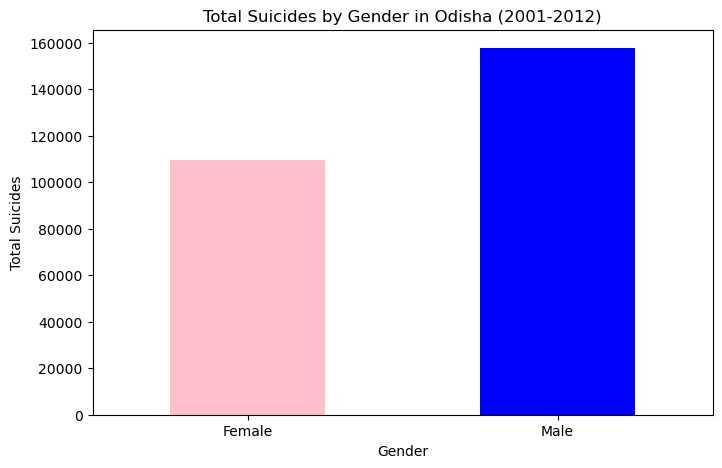

In [29]:
def plot_suicides_by_gender_state(state):
    # Filter data by the chosen state
    df_state = df[df['State'] == state]
    
    # Group by gender
    gender_suicides = df_state.groupby('Gender')['Total'].sum()
    
    # Plot suicides by gender for the chosen state
    plt.figure(figsize=(8,5))
    gender_suicides.plot(kind='bar', color=['pink','blue'])
    plt.title(f'Total Suicides by Gender in {state} (2001-2012)')
    plt.xlabel('Gender')
    plt.ylabel('Total Suicides')
    plt.xticks(rotation=0)
    plt.show()

# Example: Plot suicides by gender for "Maharashtra"
plot_suicides_by_gender_state('Odisha')


<Figure size 1000x600 with 0 Axes>

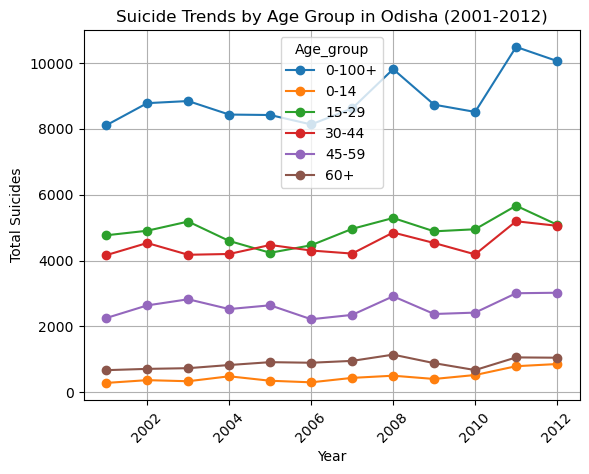

In [31]:
def plot_suicides_by_age_state(state):
    # Filter data by the chosen state
    df_state = df[df['State'] == state]
    
    # Group by Year and Age Group
    age_year_suicides = df_state.groupby(['Year', 'Age_group'])['Total'].sum().unstack()

    # Plot suicides by age group over time
    plt.figure(figsize=(10,6))
    age_year_suicides.plot(kind='line', marker='o')
    plt.title(f'Suicide Trends by Age Group in {state} (2001-2012)')
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot suicides by age group for "Karnataka"
plot_suicides_by_age_state('Odisha')


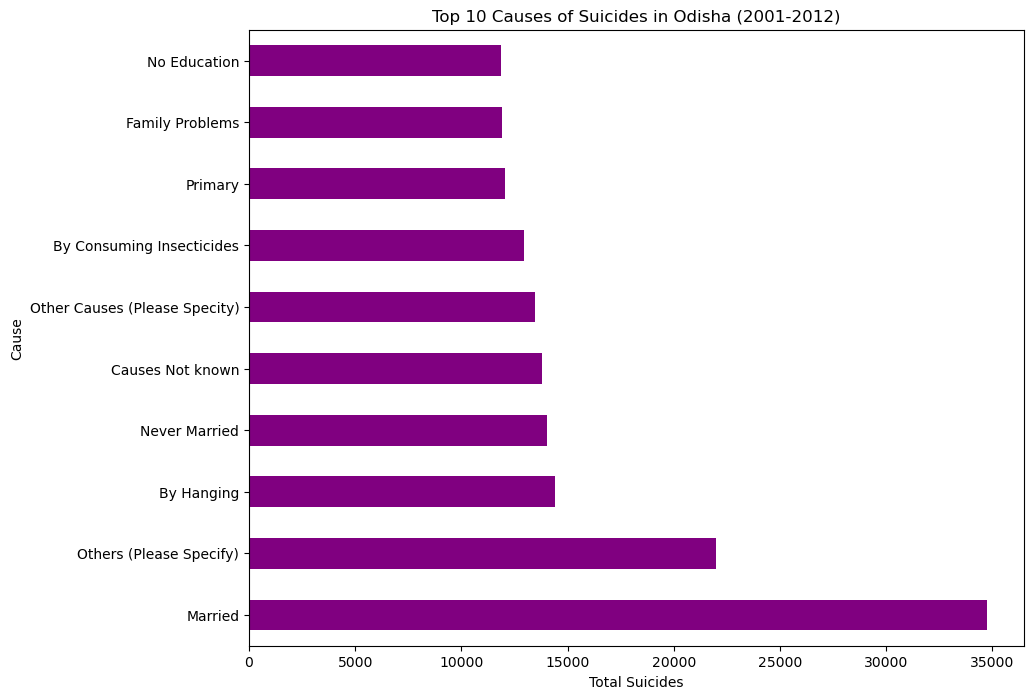

In [33]:
def plot_top_causes_state(state):
    # Filter data by the chosen state
    df_state = df[df['State'] == state]
    
    # Group by Cause (Type) and sum total suicides
    causes_suicides = df_state.groupby('Type')['Total'].sum().sort_values(ascending=False)

    # Plot the top 10 causes of suicides
    plt.figure(figsize=(10,8))
    causes_suicides.head(10).plot(kind='barh', color='purple')
    plt.title(f'Top 10 Causes of Suicides in {state} (2001-2012)')
    plt.xlabel('Total Suicides')
    plt.ylabel('Cause')
    plt.show()

# Example: Plot top 10 causes of suicides for "Tamil Nadu"
plot_top_causes_state('Odisha')


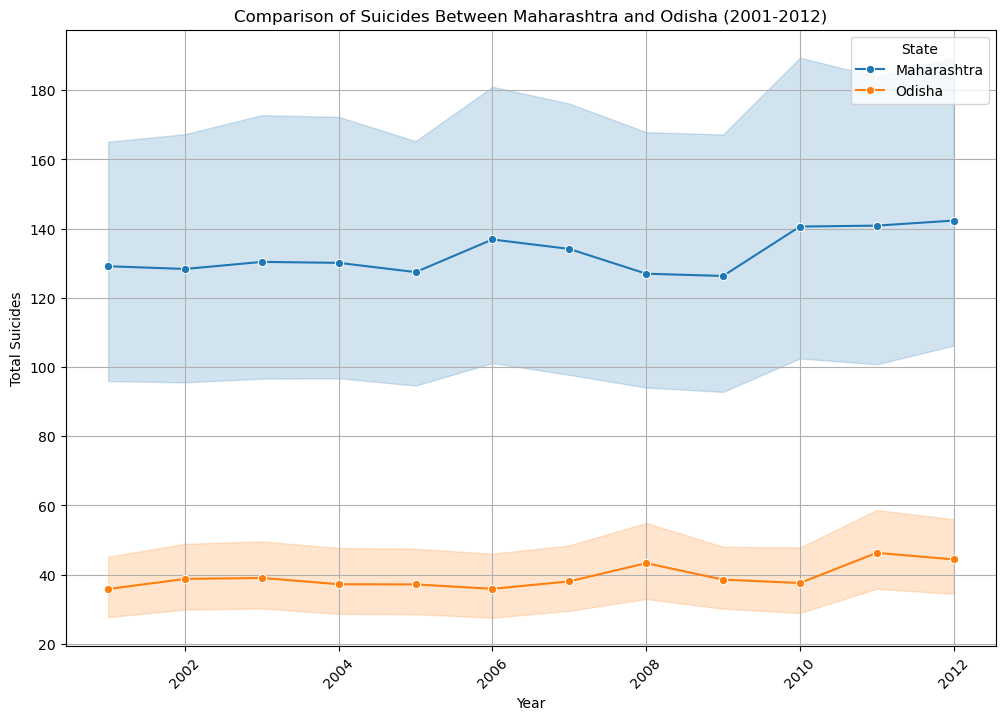

In [35]:
def compare_suicides_between_states(state1, state2):
    # Filter data for the two states
    df_compare = df[df['State'].isin([state1, state2])]

    # Plot comparison of total suicides between two states over time
    plt.figure(figsize=(12,8))
    sns.lineplot(x='Year', y='Total', hue='State', data=df_compare, marker='o')
    plt.title(f'Comparison of Suicides Between {state1} and {state2} (2001-2012)')
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Example: Compare suicides between "West Bengal" and "Gujarat"
compare_suicides_between_states('Maharashtra', 'Odisha')


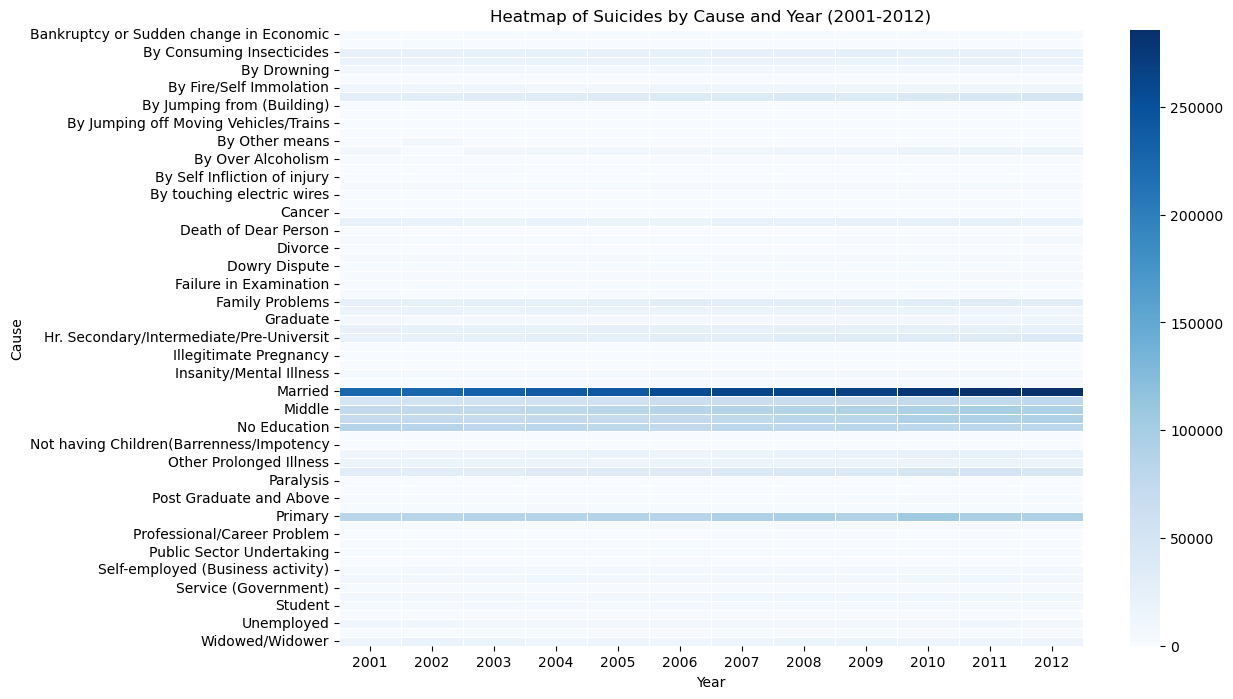

In [37]:
# Create a pivot table to show causes of suicides across different years
cause_year_pivot = df.pivot_table('Total', index='Type', columns='Year', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cause_year_pivot, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Suicides by Cause and Year (2001-2012)')
plt.xlabel('Year')
plt.ylabel('Cause')
plt.show()


<Figure size 1000x600 with 0 Axes>

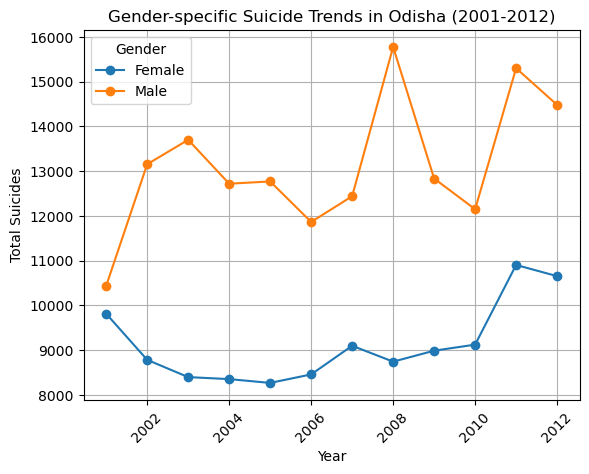

In [39]:
def plot_gender_suicides_state(state):
    # Filter data by the chosen state
    df_state = df[df['State'] == state]

    # Group by Year and Gender
    gender_year_suicides = df_state.groupby(['Year', 'Gender'])['Total'].sum().unstack()

    # Plot gender-specific suicide trends over time
    plt.figure(figsize=(10,6))
    gender_year_suicides.plot(kind='line', marker='o')
    plt.title(f'Gender-specific Suicide Trends in {state} (2001-2012)')
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot gender-specific suicide trends for "Kerala"
plot_gender_suicides_state('Odisha')


<Figure size 1200x800 with 0 Axes>

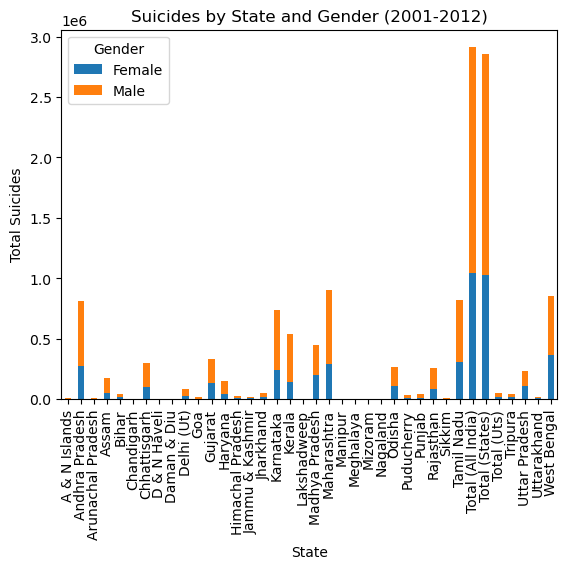

In [41]:
# Group by State and Gender, and plot the total suicides for each
state_gender_suicides = df.groupby(['State', 'Gender'])['Total'].sum().unstack()

# Plot suicides by state and gender
plt.figure(figsize=(12,8))
state_gender_suicides.plot(kind='bar', stacked=True)
plt.title('Suicides by State and Gender (2001-2012)')
plt.xlabel('State')
plt.ylabel('Total Suicides')
plt.xticks(rotation=90)
plt.show()


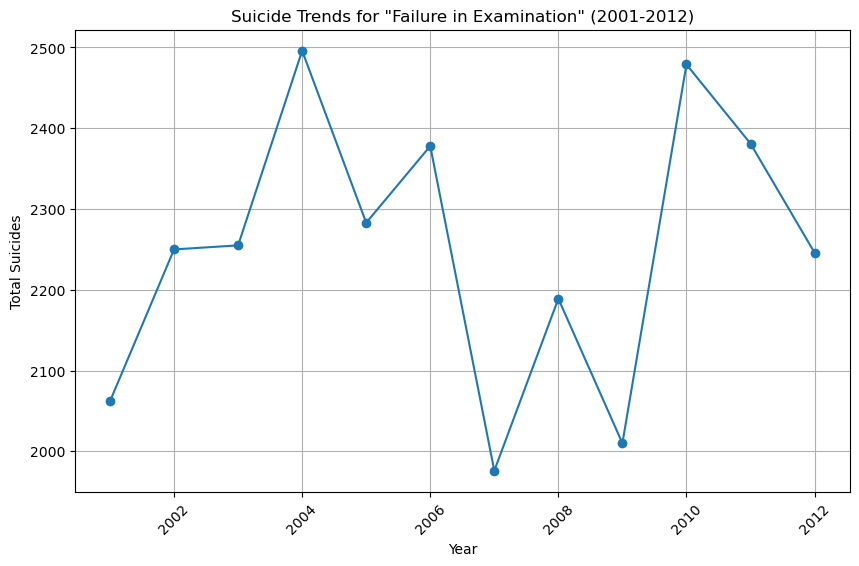

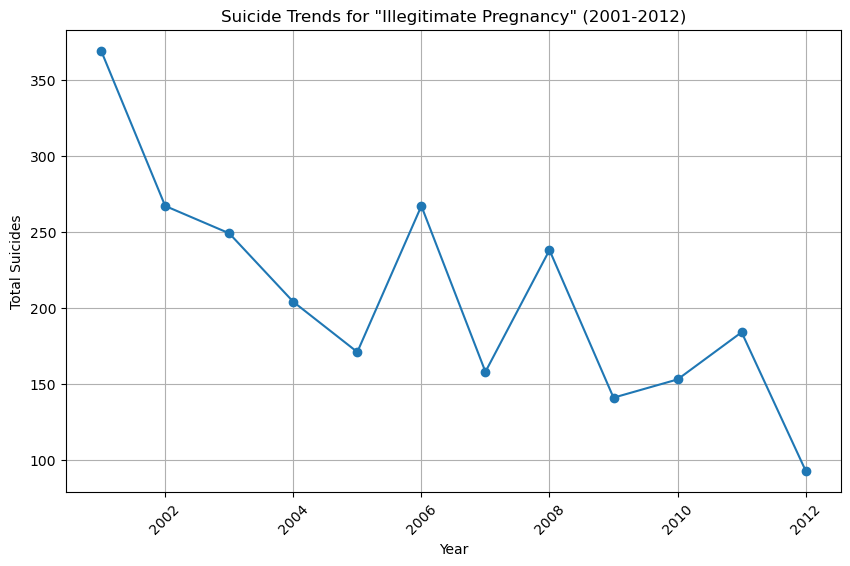

In [43]:
def plot_suicides_by_type(suicide_type):
    # Filter data by the specific type of suicide
    df_type = df[df['Type'] == suicide_type]
    
    # Group by Year and sum total suicides
    type_year_suicides = df_type.groupby('Year')['Total'].sum()

    # Plot suicides for the specific cause over the years
    plt.figure(figsize=(10,6))
    type_year_suicides.plot(kind='line', marker='o')
    plt.title(f'Suicide Trends for "{suicide_type}" (2001-2012)')
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot suicides for "Failure in Examination"
plot_suicides_by_type('Failure in Examination')

# Example: Plot suicides for "Illegitimate Pregnancy"
plot_suicides_by_type('Illegitimate Pregnancy')


<Figure size 1200x800 with 0 Axes>

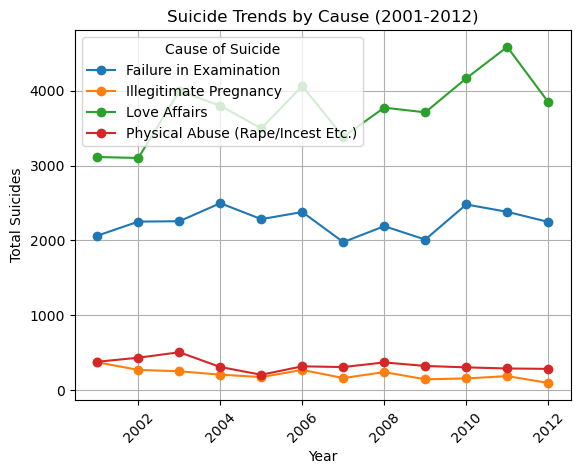

In [49]:
def compare_suicides_by_types(types_list):
    # Filter data by the selected types
    df_types = df[df['Type'].isin(types_list)]
    
    # Group by Year and Type
    type_year_suicides = df_types.groupby(['Year', 'Type'])['Total'].sum().unstack()

    # Plot suicides for the selected types over the years
    plt.figure(figsize=(12,8))
    type_year_suicides.plot(kind='line', marker='o')
    plt.title('Suicide Trends by Cause (2001-2012)')
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title="Cause of Suicide")
    plt.show()

# Example: Compare suicides for "Failure in Examination", "Love Affairs", and "Physical Abuse"
compare_suicides_by_types(['Failure in Examination', 'Love Affairs', 'Physical Abuse (Rape/Incest Etc.)','Illegitimate Pregnancy'])


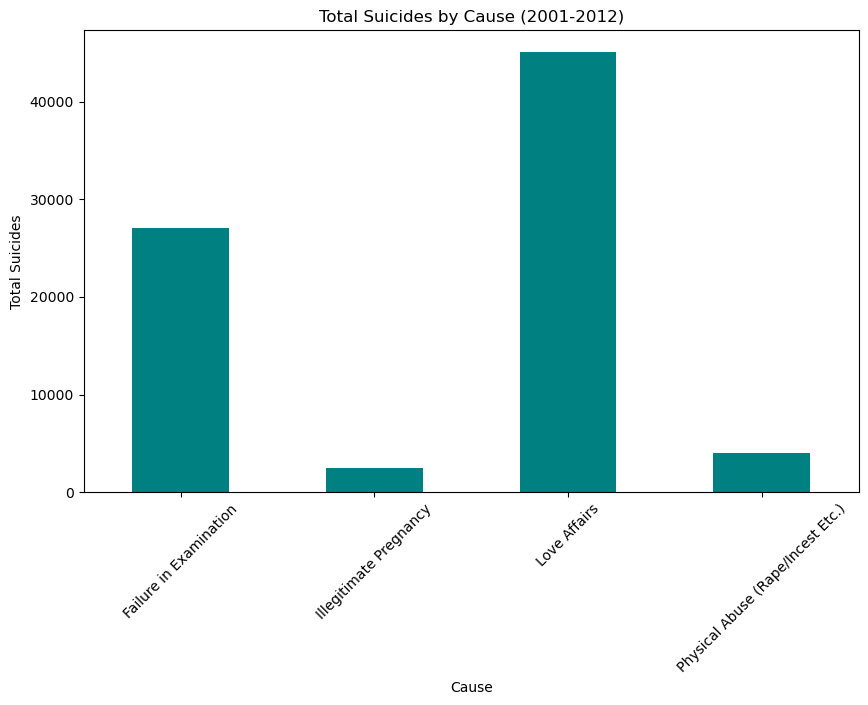

In [53]:
def plot_total_suicides_by_types(types_list):
    # Filter data by the selected types
    df_types = df[df['Type'].isin(types_list)]
    
    # Group by Type and sum total suicides
    total_suicides_by_type = df_types.groupby('Type')['Total'].sum()

    # Plot total suicides for each type
    plt.figure(figsize=(10,6))
    total_suicides_by_type.plot(kind='bar', color='teal')
    plt.title('Total Suicides by Cause (2001-2012)')
    plt.xlabel('Cause')
    plt.ylabel('Total Suicides')
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot total suicides for causes like "Illegitimate Pregnancy", "Cyberbullying", "Love Affairs"
plot_total_suicides_by_types(['Illegitimate Pregnancy','Failure in Examination','Physical Abuse (Rape/Incest Etc.)','Love Affairs'])


In [55]:
df.shape


(237519, 7)

In [57]:
# Descriptive statistics for the entire dataset
df.describe()


,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


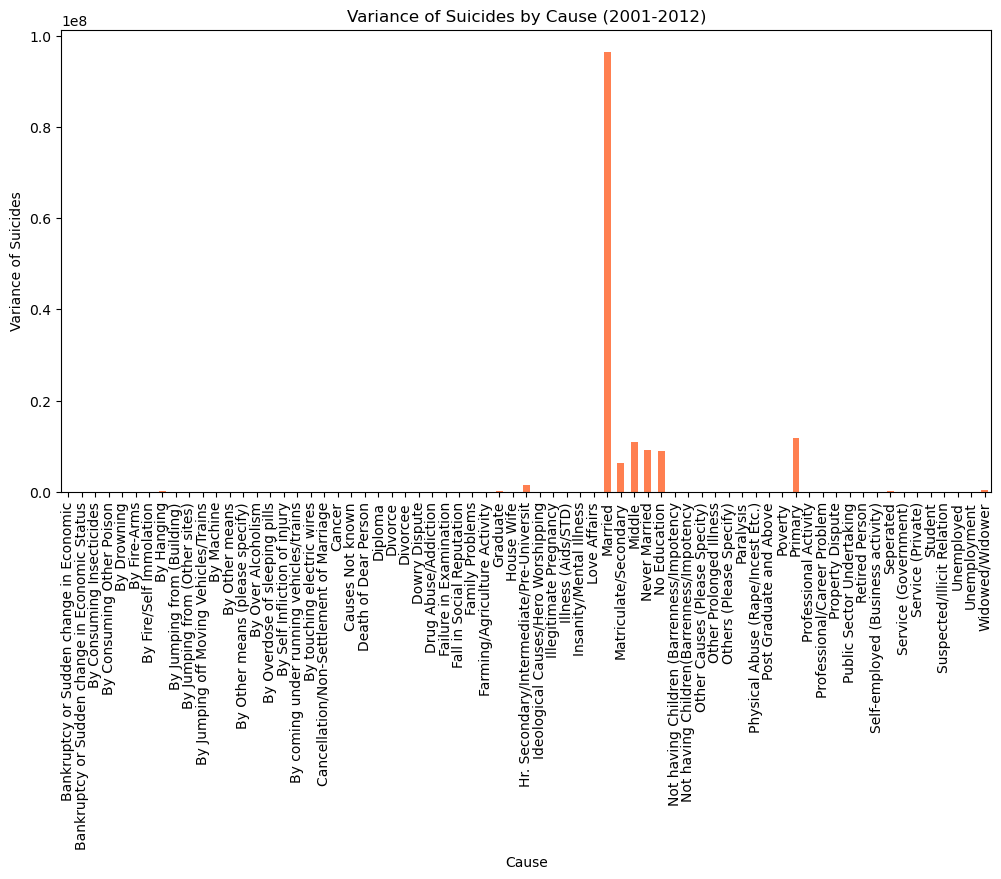

In [59]:
# Group by Type (Cause) and calculate variance of Total Suicides
cause_variance = df.groupby('Type')['Total'].var()

# Plot the variance of suicides by cause
plt.figure(figsize=(12,6))
cause_variance.plot(kind='bar', color='coral')
plt.title('Variance of Suicides by Cause (2001-2012)')
plt.xlabel('Cause')
plt.ylabel('Variance of Suicides')
plt.xticks(rotation=90)
plt.show()


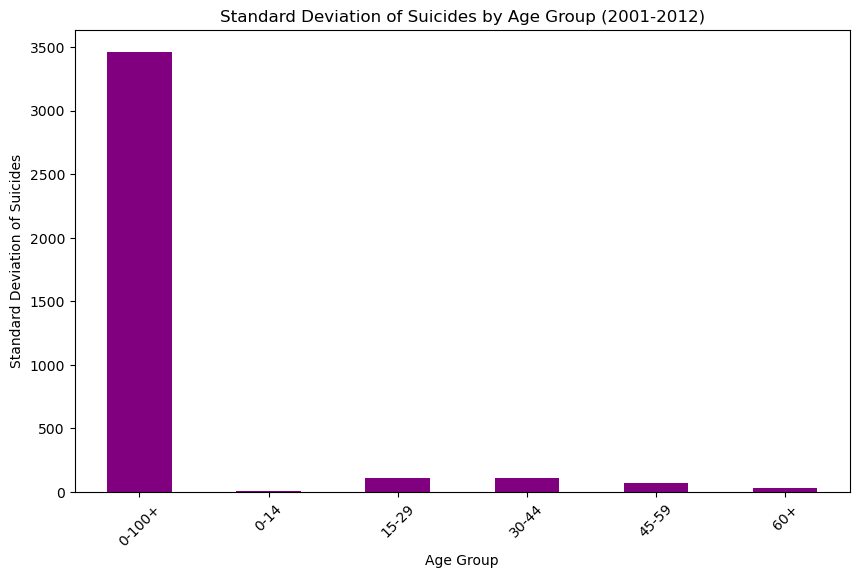

In [61]:
# Group by Age Group and calculate standard deviation of Total Suicides
age_group_std = df.groupby('Age_group')['Total'].std()

# Plot the standard deviation of suicides by age group
plt.figure(figsize=(10,6))
age_group_std.plot(kind='bar', color='purple')
plt.title('Standard Deviation of Suicides by Age Group (2001-2012)')
plt.xlabel('Age Group')
plt.ylabel('Standard Deviation of Suicides')
plt.xticks(rotation=45)
plt.show()


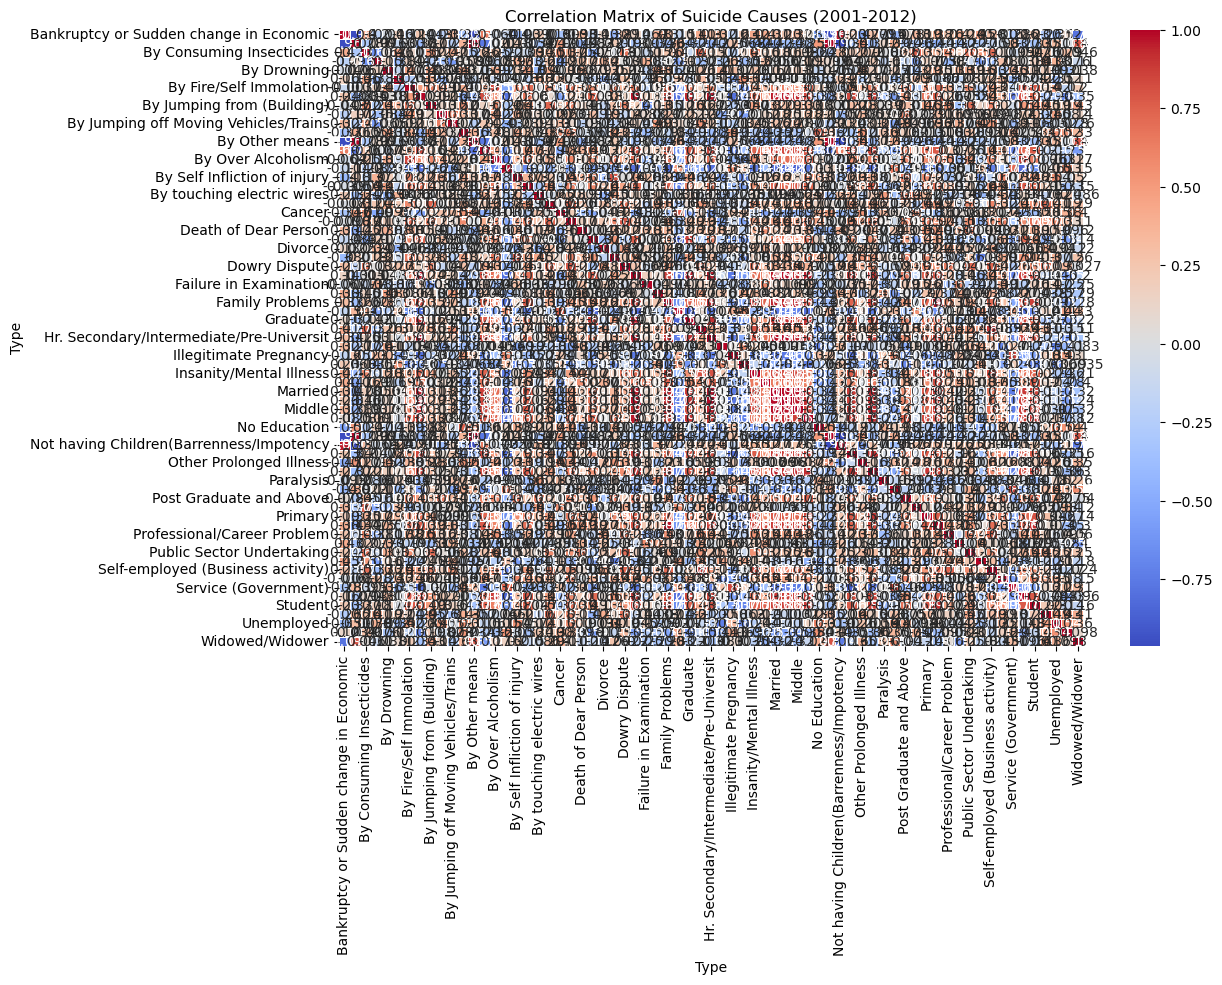

In [63]:
# Create a pivot table for causes of suicides across years
cause_year_pivot = df.pivot_table('Total', index='Year', columns='Type', aggfunc='sum', fill_value=0)

# Calculate the correlation matrix
correlation_matrix = cause_year_pivot.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Matrix of Suicide Causes (2001-2012)')
plt.show()


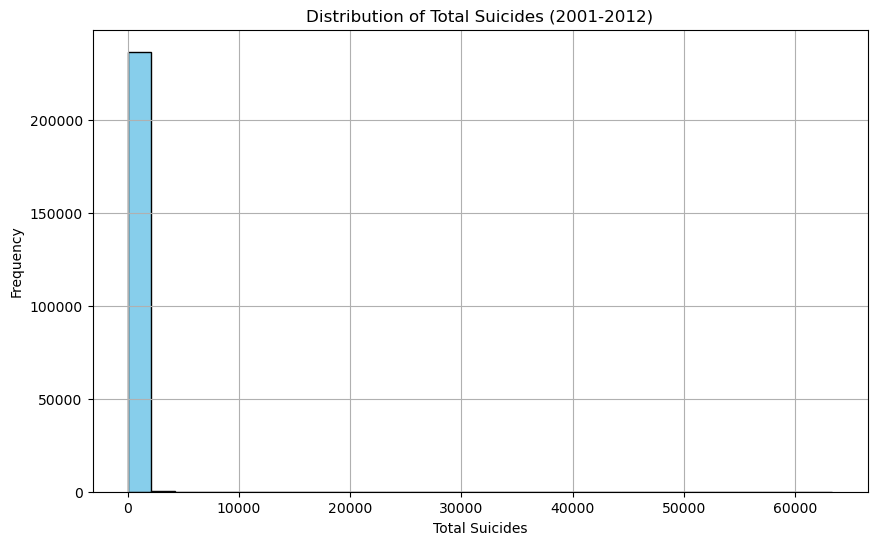

In [65]:
# Plot histogram for Total Suicides
plt.figure(figsize=(10,6))
plt.hist(df['Total'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Suicides (2001-2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


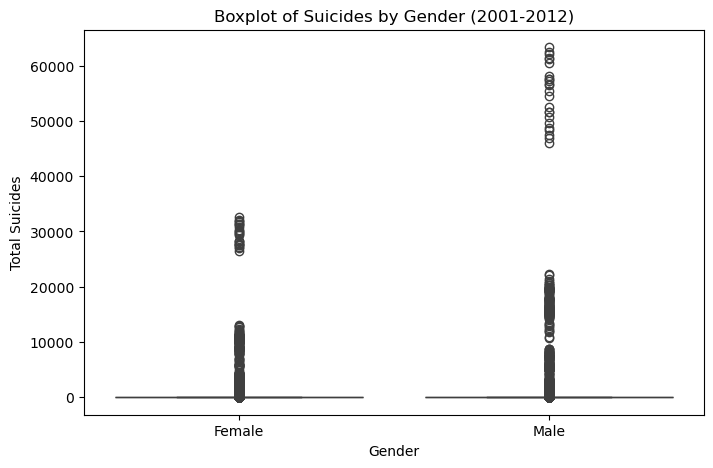

In [67]:
# Boxplot for Total Suicides by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Total', data=df)
plt.title('Boxplot of Suicides by Gender (2001-2012)')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.show()


In [69]:
# Basic statistics for Suicide Rate per 100K People
mean_suicide_rate = df['Suicide_Rate_per_100K'].mean()
std_suicide_rate = df['Suicide_Rate_per_100K'].std()
variance_suicide_rate = df['Suicide_Rate_per_100K'].var()
min_suicide_rate = df['Suicide_Rate_per_100K'].min()
max_suicide_rate = df['Suicide_Rate_per_100K'].max()

print(f'Mean Suicide Rate: {mean_suicide_rate}')
print(f'Standard Deviation of Suicide Rate: {std_suicide_rate}')
print(f'Variance of Suicide Rate: {variance_suicide_rate}')
print(f'Minimum Suicide Rate: {min_suicide_rate}')
print(f'Maximum Suicide Rate: {max_suicide_rate}')


KeyError: 'Suicide_Rate_per_100K'

In [71]:
# Basic statistics for Total Suicides
mean_suicides = df['Total'].mean()
std_suicides = df['Total'].std()
variance_suicides = df['Total'].var()
min_suicides = df['Total'].min()
max_suicides = df['Total'].max()

print(f'Mean Suicides: {mean_suicides}')
print(f'Standard Deviation of Suicides: {std_suicides}')
print(f'Variance of Suicides: {variance_suicides}')
print(f'Minimum Suicides: {min_suicides}')
print(f'Maximum Suicides: {max_suicides}')


Mean Suicides: 55.03447724182065
Standard Deviation of Suicides: 792.7490383474644
Variance of Suicides: 628451.0378008296
Minimum Suicides: 0
Maximum Suicides: 63343


                         mean         std            var  min   max
State                                                              
A & N Islands        1.208135    4.705865      22.145170    0    73
Andhra Pradesh     119.873215  409.666717  167826.818827    0  8659
Arunachal Pradesh    0.988967    4.220531      17.812882    0    76
Assam               25.386973   82.667850    6833.973443    0  1600
Bihar                6.806186   22.486090     505.624236    0   495


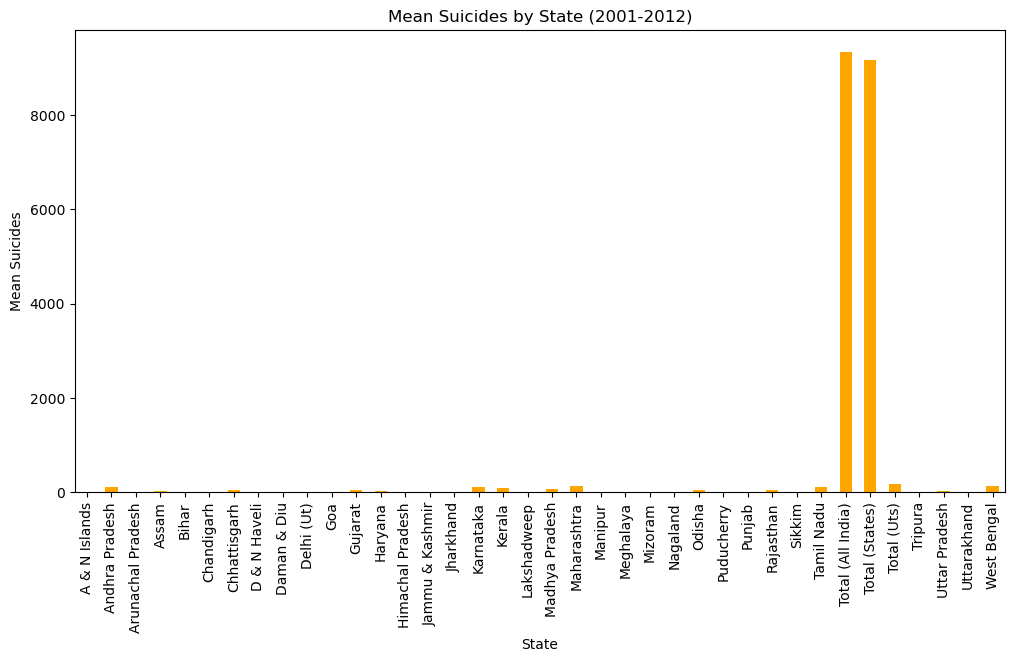

In [73]:
# Grouping by State and calculating summary statistics for Total Suicides
state_stats = df.groupby('State')['Total'].agg(['mean', 'std', 'var', 'min', 'max'])
print(state_stats.head())  # Print the first few rows

# Plot the mean suicides by state
plt.figure(figsize=(12,6))
state_stats['mean'].plot(kind='bar', color='orange')
plt.title('Mean Suicides by State (2001-2012)')
plt.xlabel('State')
plt.ylabel('Mean Suicides')
plt.xticks(rotation=90)
plt.show()


             mean         std            var  min    max
Gender                                                  
Female  39.640711  541.224571  292924.036067    0  32582
Male    70.397295  981.242197  962836.249178    0  63343


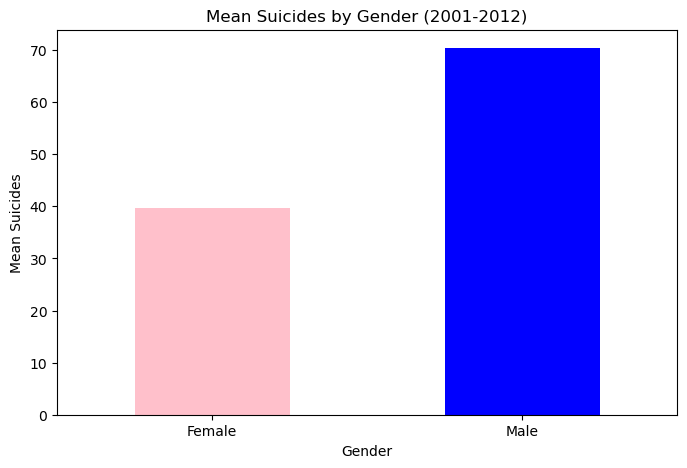

In [77]:
# Group by Gender and calculate summary statistics for Total Suicides
gender_stats = df.groupby('Gender')['Total'].agg(['mean', 'std', 'var', 'min', 'max'])
print(gender_stats)

# Plot the mean suicides by gender
plt.figure(figsize=(8,5))
gender_stats['mean'].plot(kind='bar', color=['pink', 'blue'])
plt.title('Mean Suicides by Gender (2001-2012)')
plt.xlabel('Gender')
plt.ylabel('Mean Suicides')
plt.xticks(rotation=0)
plt.show()


                                                     mean         std  \
Type                                                                    
Bankruptcy or Sudden change in Economic          8.507792   35.850844   
Bankruptcy or Sudden change in Economic Status   7.585714   32.240453   
By Consuming Insecticides                       65.595476  163.371795   
By Consuming Other Poison                       55.042381  128.198157   
By Drowning                                     23.026429   48.269067   

                                                         var  min   max  
Type                                                                     
Bankruptcy or Sudden change in Economic          1285.283000    0   495  
Bankruptcy or Sudden change in Economic Status   1039.446787    0   364  
By Consuming Insecticides                       26690.343347    0  1494  
By Consuming Other Poison                       16434.767434    0  1041  
By Drowning                                 

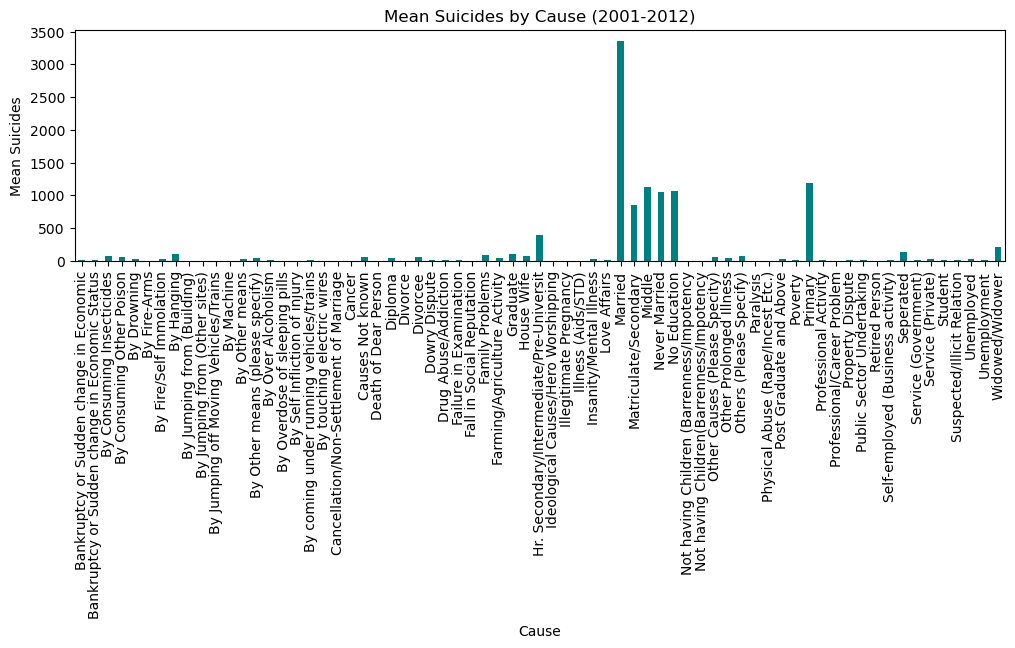

In [87]:
# Group by Cause (Type) and calculate summary statistics for Total Suicides
cause_stats = df.groupby('Type')['Total'].agg(['mean', 'std', 'var', 'min', 'max'])
print(cause_stats.head())  # Print the first few rows

# Plot the mean suicides by cause
plt.figure(figsize=(12,3))
cause_stats['mean'].plot(kind='bar', color='teal')
plt.title('Mean Suicides by Cause (2001-2012)')
plt.xlabel('Cause')
plt.ylabel('Mean Suicides')
plt.xticks(rotation=90)
plt.show()
